Importing and checking TensorFlow version

In [0]:
import tensorflow.keras as keras
import tensorflow as tf
print(tf.__version__)

1.13.1


Loading dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.


In [0]:
mnist = tf.keras.datasets.mnist # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data() # unpacks images to x_train/x_test and labels to y_train/y_test
print(x_train[0])

11493376/11490434 [==============================] - 0s 0us/step
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]

Displaying first digit from dataset with help of matplotlib

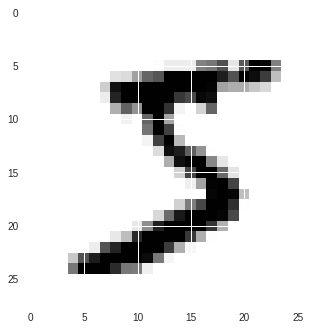

5


In [0]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()
print(y_train[0])

Each input feature has value between 0 to 255, Normalizing each pixel values between 0 to 1

In [0]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

Creating binary color map with matplotlb

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

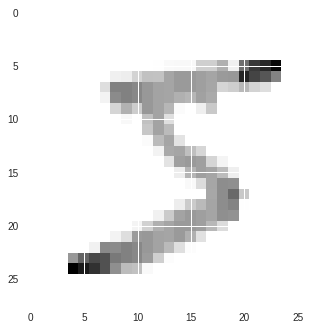

In [0]:
print(x_train[0])
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

Selecting model type and adding layes to our neural network

In [0]:
model = tf.keras.models.Sequential()
#Input layer of neural network should be flat, so we will convert 28*28 pixels into 1*784 pixels image for FLAT input
model.add(tf.keras.layers.Flatten())# a basic feed-forward model
#Well, if you just have a single hidden layer, the model is going to only learn linear relationships.
#If you have many hidden layers, you can begin to learn non-linear relationships between your input and output layers.
#This layer has 128 units. The activation function is relu, short for rectified linear. Currently, relu is the activation function you should just default to
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#Next, we want our hidden layers. We're going to go with the simplest neural network layer, which is just a Dense layer. This refers to the fact that it's a densely-connected layer, meaning it's "fully connected," where each node connects to each prior and subsequent node. Just like our image.
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#This is our final layer. It has 10 nodes. 1 node per possible number prediction
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [0]:
model.compile(optimizer='adam',# Good default optimizer to start with
              loss='sparse_categorical_crossentropy',# how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])# what to track
model.fit(x_train, y_train, epochs=3)# train the model

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/3
60000/60000 [==============================] - 9s 143us/sample - loss: 0.2608 - acc: 0.9247
Epoch 2/3
60000/60000 [==============================] - 8s 128us/sample - loss: 0.1068 - acc: 0.9670
Epoch 3/3
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0740 - acc: 0.9768


In [0]:
val_loss, val_acc = model.evaluate(x_test, y_test) # evaluate the out of sample data with model
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 0s 50us/sample - loss: 0.0967 - acc: 0.9726
0.09665781858880072
0.9726


In [0]:
#Finally, with your model, you can save it super easily:
model.save('epic_num_reader.model')
new_model = tf.keras.models.load_model('epic_num_reader.model')
#finally, make predictions!
predictions = new_model.predict(x_test)
print(predictions)

[[1.35727376e-08 3.49798569e-07 2.62267645e-06 ... 9.99951601e-01
  8.26347790e-09 1.00232349e-07]
 [1.16730931e-07 6.59635197e-03 9.93400335e-01 ... 9.61342650e-09
  1.16722640e-06 2.04302356e-11]
 [1.13118324e-06 9.99835968e-01 1.05817790e-05 ... 3.01937380e-05
  4.62724092e-05 1.60006380e-07]
 ...
 [2.06070827e-09 3.73239527e-06 3.87418186e-09 ... 1.88289287e-05
  6.31767989e-07 8.40735811e-05]
 [9.60849320e-07 1.29357704e-06 1.57392662e-06 ... 8.44201440e-06
  1.79346616e-03 1.08590115e-08]
 [4.23974052e-05 3.39290364e-06 1.24905891e-05 ... 1.57936864e-08
  6.37954145e-07 2.47171243e-07]]


In [0]:
#We can get the actual number pretty simply:
import numpy as np
print(np.argmax(predictions[0]))

7


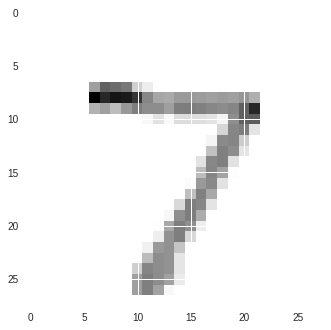

In [0]:
#There's your prediction, let's look at the input:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()